In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
center_a_coordinate = (382, 392)
center_d_coordinate = (255.5, 255.5)

# actual pixel position measured from product image
pixel_xa_plus = np.array([475, 513, 561, 581, 619, 631, 663, 675, 702, 716, 732])
pixel_xa_minus = np.array([289, 250, 208, 188, 154, 140, 108, 99, 74, 60, 43])
pixel_ya_plus = np.array([301, 257, 216, 195, 159, 146, 116, 105, 79, 68, 51])
pixel_ya_minus = np.array([483, 530, 570, 597, 626, 645, 671, 686, 706, 723, 737])
# pixel position measure from design image
pixel_d_minus = np.array([190, 154, 128, 107, 88, 71, 55, 41, 27, 15, 5])

img_a_array = np.moveaxis(np.array(Image.open('./aperture/product/result_14_6_measure.png')), 0, 1)
img_d_array = np.moveaxis(np.array(Image.open('./aperture/product/f32f45_angular8_measure.bmp')), 0, 1)
#micron_per_pixel_x = 168.875 * 0.4 /(pixel_xa_minus[1] - pixel_xa_minus[2])
micron_per_pixel_y = 1015.427 /686
#print(micron_per_pixel_x)
print(micron_per_pixel_y)
micron_per_pixel = micron_per_pixel_y
# print(micron_per_pixel)
micron_per_design_pixel = 2
rxa_minus = (center_a_coordinate[0] - pixel_xa_minus)*micron_per_pixel
rxa_plus = (pixel_xa_plus - center_a_coordinate[0])*micron_per_pixel
rya_minus = (pixel_ya_minus - center_a_coordinate[1])*micron_per_pixel
rya_plus = (center_a_coordinate[1] - pixel_ya_plus)*micron_per_pixel
rd = (center_d_coordinate[0] - pixel_d_minus) * micron_per_design_pixel
print('/////////////////////////')
print(f'designed markers radial location: {rd} μm')
print(f'marker radial position difference (actual - designed)')
print(f'-x axes: {np.round(rxa_minus-rd, 2)} μm')
print(f'+x axes: {np.round(rxa_plus-rd, 2)} μm')
print(f'-y axes: {np.round(rya_minus-rd, 2)} μm')
print(f'+y axes: {np.round(rya_plus-rd, 2)} μm')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.4802142857142857
/////////////////////////
designed markers radial location: [131. 203. 255. 297. 335. 369. 401. 429. 457. 481. 501.] μm
marker radial position difference (actual - designed)
-x axes: [  6.66  -7.61   2.56  -9.84   2.49 -10.79   4.58 -10.1   -1.09  -4.37
   0.79] μm
+x axes: [ 6.66 -9.09  9.96 -2.44 15.81 -0.43 14.94  4.7  16.67 13.39 17.08] μm
-y axes: [ 3.7   1.27  8.48  6.44 11.37  5.49 11.98  6.18  7.79  8.95  9.67] μm
+y axes: [ 3.7  -3.17  5.52 -5.4   9.89 -4.87  7.54 -4.18  6.31 -1.41  3.75] μm


In [12]:
tmp_x = (rxa_minus-rd + rxa_plus-rd)/2
tmp_y = (rya_minus-rd + rya_plus-rd)/2
avg_x = (tmp_x[0] - tmp_x[1] + tmp_x[2] - tmp_x[3] + tmp_x[4] - tmp_x[5] + tmp_x[6] - tmp_x[7] + tmp_x[8] - tmp_x[9])/5
avg_y = (tmp_y[0] - tmp_y[1] + tmp_y[2] - tmp_y[3] + tmp_y[4] - tmp_y[5] + tmp_y[6] - tmp_y[7] + tmp_y[8] - tmp_y[9])/5

In [13]:
print(f'avg x margin {avg_x:.2f} μm')
print(f'avg y margin {avg_y:.2f} μm')
print(f'avg x pen-width {(avg_x+14):.2f} μm')
print(f'avg y pen-width {(avg_y+6):.2f} μm')

avg x margin 11.58 μm
avg y margin 6.70 μm
avg x pen-width 25.58 μm
avg y pen-width 12.70 μm


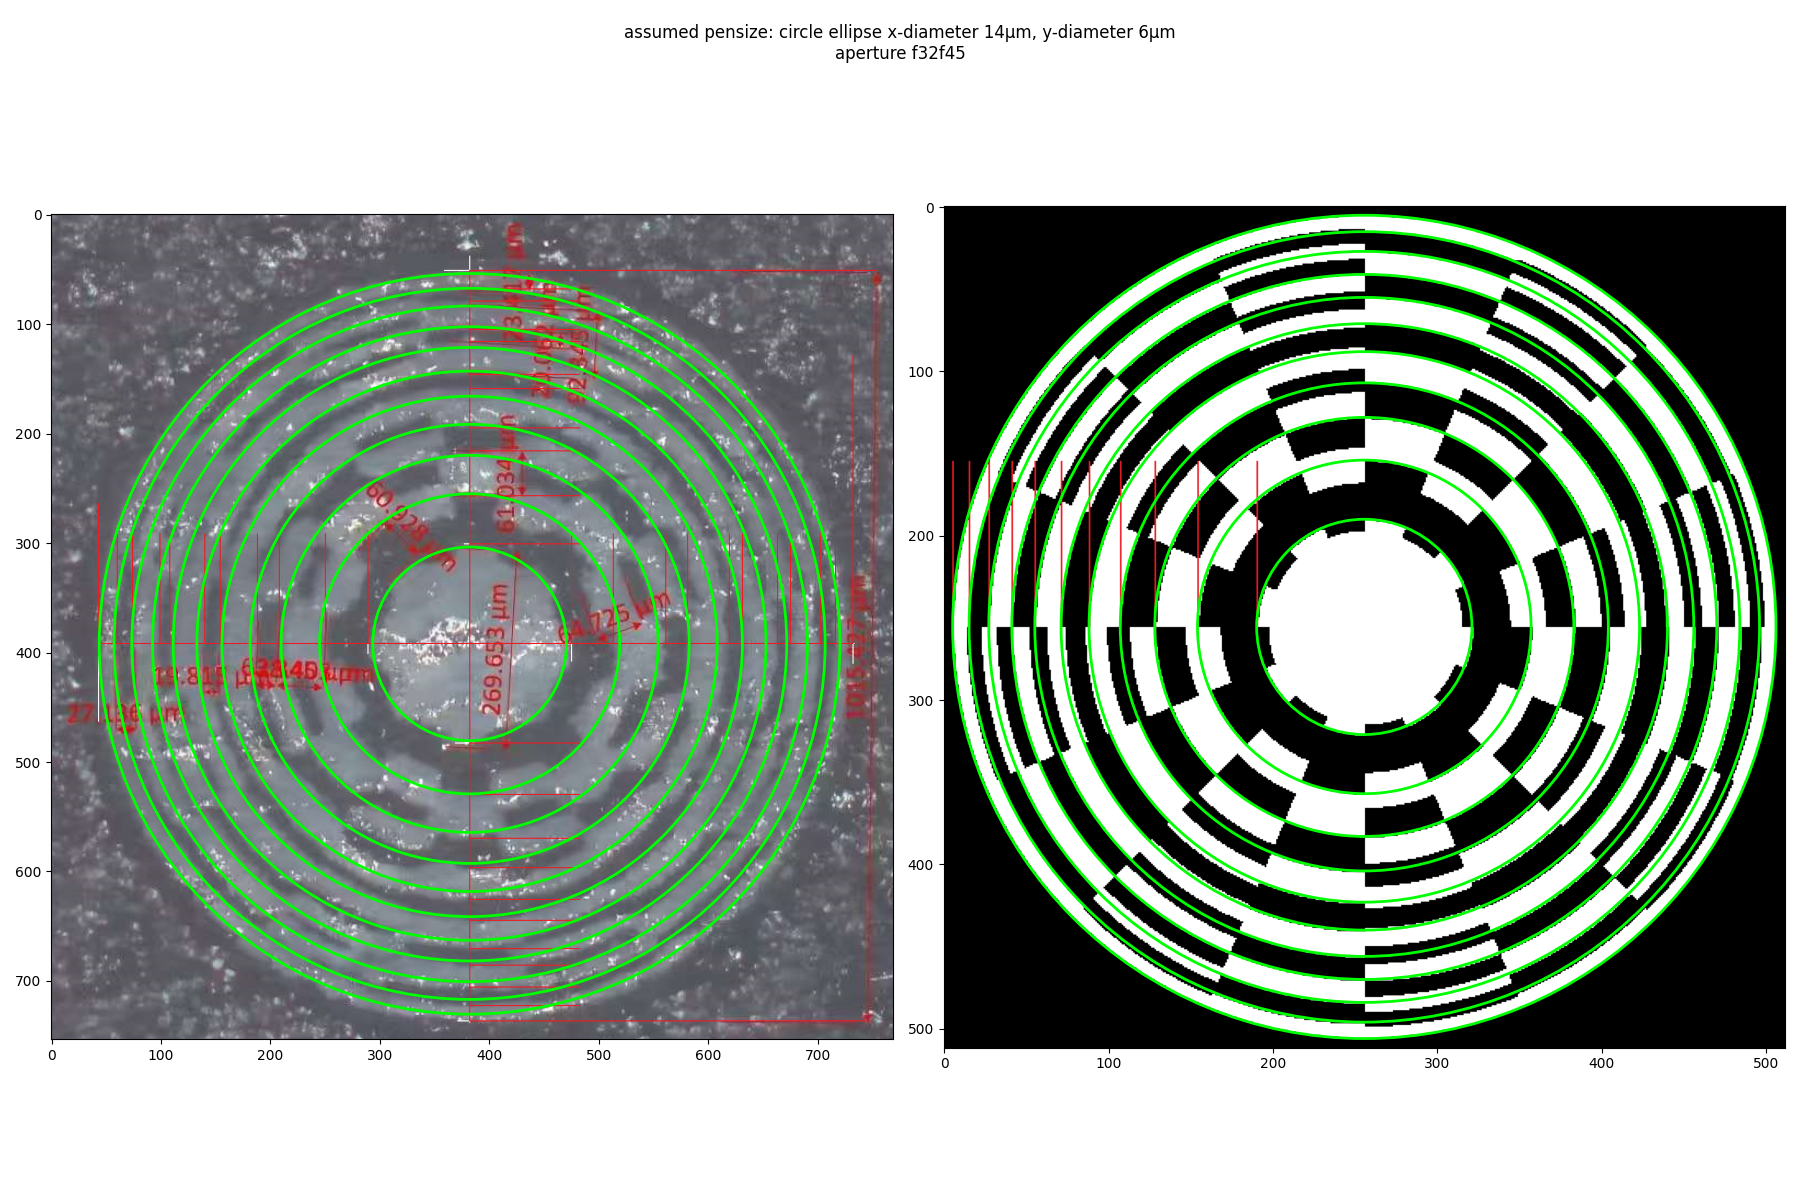

In [14]:
layout = [[0, 1]]
fig, ax = plt.subplot_mosaic(layout, figsize=(18, 12))
fig.suptitle('assumed pensize: circle ellipse x-diameter 14μm, y-diameter 6μm\naperture f32f45')
ax[0].imshow(np.moveaxis(img_a_array, 0, 1))
ax[1].imshow(np.moveaxis(img_d_array, 0, 1), cmap='grey')
for r in rd:
    circle = patches.Circle(center_a_coordinate, r/micron_per_pixel, edgecolor='lime', facecolor='none', linewidth=2)
    ax[0].add_patch(circle)
    circle = patches.Circle(center_d_coordinate, r/micron_per_design_pixel, edgecolor='lime', facecolor='none', linewidth=2)
    ax[1].add_patch(circle)
fig.tight_layout()
plt.savefig(f'aperture/tmp/compare_14_6.png', dpi=300)
plt.show()

In [33]:
print(xa.sum())
print(ya.sum())
print(xyd.sum())

152.76174027469364
162.88592811908873
147


In [34]:
print(xa[:2].sum())
print(ya[:2].sum())
print(xyd[:2].sum())

90.22616991528909
98.72357924171396
88


In [26]:
1000 / (168.875 * 648/47)

0.42949438458937594

In [7]:
aperture = np.load('./aperture/f49f33_angular8.npy')

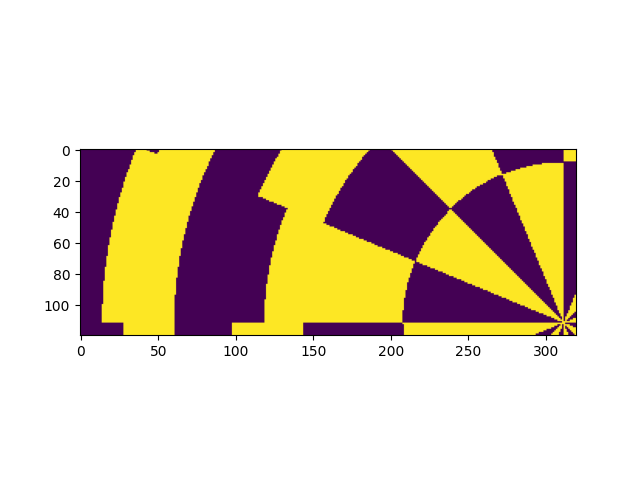

In [17]:
plt.imshow(aperture[400:520, 200:520])
plt.show()